In [3]:
import pandas as pd

In [76]:
# read csv dataset from stedin
stedin = pd.read_csv('stedin_electricity_2020.csv')
stedin.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,STANDAARDDEVIATIE
0,8716874000009,Stedin Utrecht,Egelshoek,1213RC,1231AA,HILVERSUM,14,92.86,92.86,78.57,3x25,6245.43,85.71,57.14,"6586,3873"
1,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AB,1231AB,LOOSDRECHT,17,76.47,100.00,82.35,3x25,5211.41,100.00,94.12,"2100,0159"
2,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AC,1231AC,LOOSDRECHT,17,100.00,100.00,41.18,1x25,3236.12,100.00,88.24,"1180,2710"
3,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AD,1231AD,LOOSDRECHT,17,94.12,100.00,47.06,3x25,3778.47,94.12,88.24,"1294,5305"
4,8716874000009,Stedin Utrecht,Jan Steenlaan,1231AE,1231AE,LOOSDRECHT,20,95.00,100.00,45.00,3x25,3897.70,95.00,85.00,"2530,2820"


In [163]:
stedin['net_manager'] = "stedin BV"

In [77]:
# to delete the extra 15th column to have the same numbers of column as other datasets
extracolumn = stedin.columns[-1]
extracolumn

'STANDAARDDEVIATIE'

In [78]:
stedin = stedin.drop([extracolumn], axis = 1)

In [164]:
stedin.head(2)

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,stedin BV,Stedin Utrecht,Egelshoek,1213RC,1231AA,HILVERSUM,14,92.86,92.86,78.57,3x25,6245.43,85.71,57.14
1,stedin BV,Stedin Utrecht,Rembrandtlaan,1231AB,1231AB,LOOSDRECHT,17,76.47,100.00,82.35,3x25,5211.41,100.00,94.12


In [86]:
stedin.shape

(86338, 14)

In [88]:
stedin.dtypes

net_manager                       int64
purchase_area                    object
street                           object
zipcode_from                     object
zipcode_to                       object
city                             object
num_connections                   int64
delivery_perc                   float64
perc_of_active_connections      float64
type_conn_perc                  float64
type_of_connection               object
annual_consume                  float64
annual_consume_lowtarif_perc    float64
smartmeter_perc                 float64
dtype: object

In [95]:
stedin.isnull().values.any()

False

In [90]:
# read csv dataset from liander
liander = pd.read_csv('liander_electricity_01012020.csv')
liander.head(2)

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Liander NB,LIANDER,De Ruyterkade Steigers,1011AA,1011AB,AMSTERDAM,43.0,100.00,32.56,37.21,3x25,14940,53.49,20.93
1,Liander NB,LIANDER,De Ruyterkade,1011AC,1011AC,AMSTERDAM,39.0,97.44,53.85,28.21,3x25,20776,48.72,33.33


In [91]:
liander.shape

(143886, 14)

In [92]:
liander.dtypes

net_manager                      object
purchase_area                    object
street                           object
zipcode_from                     object
zipcode_to                       object
city                             object
num_connections                 float64
delivery_perc                   float64
perc_of_active_connections      float64
type_conn_perc                  float64
type_of_connection               object
annual_consume                    int64
annual_consume_lowtarif_perc    float64
smartmeter_perc                 float64
dtype: object

In [96]:
liander.isnull().values.any()

False

In [89]:
# read csv dataset from enexis
enexis = pd.read_csv('enexis_electricity_01012020.csv')
enexis.head(2)

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Enexis B.V.,ENEXIS,Sasdijk,4251AA,4251AA,WERKENDAM,42,97.62,100,50.00,3x25,5524.52,28.41,11.90
1,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,17,94.12,100,41.18,1x25,4022.88,35.36,47.06


In [102]:
enexis.shape

(124877, 14)

In [94]:
enexis.dtypes

net_manager                      object
purchase_area                    object
street                           object
zipcode_from                     object
zipcode_to                       object
city                             object
num_connections                   int64
delivery_perc                   float64
perc_of_active_connections        int64
type_conn_perc                  float64
type_of_connection               object
annual_consume                  float64
annual_consume_lowtarif_perc    float64
smartmeter_perc                 float64
dtype: object

In [97]:
enexis.isnull().values.any()

False

In [165]:
# append datasets into 1 dataset
mergedf = pd.concat([stedin,liander,enexis]) 
mergedf.shape

(355101, 14)

In [115]:
# Question 1: How much electricity has Amsterdam consumed in 2020?
amsterdam_electricity = mergedf.loc[mergedf.city == 'AMSTERDAM']
amsterdam_annual_electricity = amsterdam_electricity.annual_consume.sum()
amsterdam_annual_electricity 

54131139.0

In [175]:
# Question 2: Which city has consumed the most electricity in 2020?
cities_annual_electricity = mergedf.groupby("city")["annual_consume"].sum()
cities_annual_electricity

city
'S GRAVENMOER       206759.30
'S-GRAVELAND        200493.00
'S-GRAVENDEEL       669984.31
'S-GRAVENHAGE     38925186.62
'S-HEERENBERG       899546.00
                     ...     
ZWIJNDRECHT        2603798.47
ZWINDEREN            72324.23
ZWOLLE            10194440.08
Zwaagdijk-Oost        5512.00
loo                   4724.00
Name: annual_consume, Length: 2388, dtype: float64

In [176]:
cities_annual_electricity_sorted = cities_annual_electricity.sort_values(ascending=False)
cities_annual_electricity_sorted 

city
AMSTERDAM             54131139.00
'S-GRAVENHAGE         38925186.62
ROTTERDAM             36849610.36
UTRECHT               22417999.89
ALMERE                17405634.00
                         ...     
AMSTEVEEN                 2322.00
OUDEZIJL                  2220.80
NIEUWGEIN                 1598.40
NIEUWERBRUG               1545.50
AMSTERDAM ZUID00ST        1533.00
Name: annual_consume, Length: 2388, dtype: float64

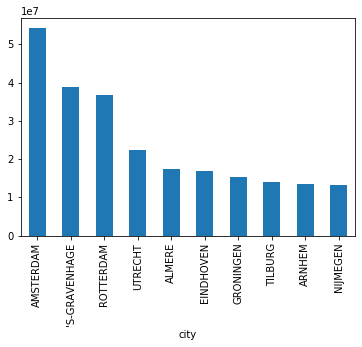

In [177]:
# showing top 10 cities in bar plot
cities_annual_electricity_sorted[0:10]
cities_annual_electricity_sorted_plot = cities_annual_electricity_sorted[0:10].plot.bar()

In [178]:
# Question 3: People in which city are more likely to consume electricty during low tariff hours?
# (low tariff hours: from 10 p.m. to 7 a.m. and during weekends) 
cities_annual_consume_lowtarif_perc = mergedf.groupby("city")["annual_consume_lowtarif_perc"].sum()
cities_annual_consume_lowtarif_perc

city
'S GRAVENMOER       2424.32
'S-GRAVELAND        2773.49
'S-GRAVENDEEL      17575.91
'S-GRAVENHAGE     919304.34
'S-HEERENBERG      17237.69
                    ...    
ZWIJNDRECHT        70514.70
ZWINDEREN            477.51
ZWOLLE            130143.68
Zwaagdijk-Oost        68.75
loo                   84.62
Name: annual_consume_lowtarif_perc, Length: 2388, dtype: float64

In [179]:
cities_annual_consume_lowtarif_perc_sorted = cities_annual_consume_lowtarif_perc.sort_values(ascending=False)
cities_annual_consume_lowtarif_perc_sorted

city
AMSTERDAM             1125410.91
ROTTERDAM              985985.20
'S-GRAVENHAGE          919304.34
UTRECHT                510218.97
ALMERE                 386185.17
                         ...    
CULEMBURG                  40.74
LANGEDIJK                  40.00
OUDEZIJL                   35.98
HAARLEM 1786136            25.00
AMSTERDAM ZUID00ST          5.88
Name: annual_consume_lowtarif_perc, Length: 2388, dtype: float64

In [148]:
# Question 4:Which company has offered the most net energy consumtion? 
# (net energy consumption = Consumption_per_year x delivery_percentage_per_year)
mergedf.dtypes

net_manager                      object
purchase_area                    object
street                           object
zipcode_from                     object
zipcode_to                       object
city                             object
num_connections                 float64
delivery_perc                   float64
perc_of_active_connections      float64
type_conn_perc                  float64
type_of_connection               object
annual_consume                  float64
annual_consume_lowtarif_perc    float64
smartmeter_perc                 float64
dtype: object

In [185]:
mergedf["delivery_perc"]

0          92.86
1          76.47
2         100.00
3          94.12
4          95.00
           ...  
124872     76.19
124873     60.00
124874      8.33
124875     50.00
124876     57.14
Name: delivery_perc, Length: 355101, dtype: float64

In [186]:
mergedf['annual_net_consume'] = mergedf["annual_consume"] * mergedf["delivery_perc"] / 100
mergedf.head(1) 

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,annual_net_consume
0,stedin BV,Stedin Utrecht,Egelshoek,1213RC,1231AA,HILVERSUM,14.0,92.86,92.86,78.57,3x25,6245.43,85.71,57.14,5799.506298


In [187]:
companies_annual_net_consume = mergedf.groupby("net_manager")["annual_net_consume"].sum()
companies_annual_net_consume.sort_values(ascending=False)

net_manager
Liander NB     5.231794e+08
Enexis B.V.    4.612555e+08
stedin BV      2.991804e+08
Name: annual_net_consume, dtype: float64

In [280]:
# Question 5: How many % of electricity being consumed by the top 5 cities, compared to the whole Netherlands? 
nl_annual_electricity = cities_annual_electricity.sum()

In [281]:
nl_annual_electricity

1470619328.8899999

In [282]:
top5cities_percentage_annual_electricity = cities_annual_electricity_sorted[0:5] / nl_annual_electricity * 100
round(top5cities_percentage_annual_electricity,2) 

city
AMSTERDAM        3.68
'S-GRAVENHAGE    2.65
ROTTERDAM        2.51
UTRECHT          1.52
ALMERE           1.18
Name: annual_consume, dtype: float64

In [283]:
top5cities_percentage_annual_electricity['OTHER CITIES'] = 100-top5cities_percentage_annual_electricity.sum()

In [284]:
top5cities_percentage_annual_electricity

city
AMSTERDAM         3.680840
'S-GRAVENHAGE     2.646857
ROTTERDAM         2.505721
UTRECHT           1.524392
ALMERE            1.183558
OTHER CITIES     88.458633
Name: annual_consume, dtype: float64

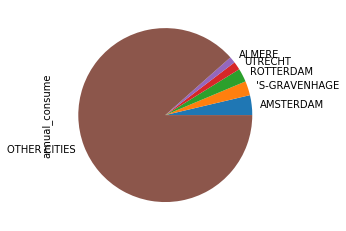

In [289]:
import matplotlib
top5cities_percentage_annual_electricity_pie = top5cities_percentage_annual_electricity.plot.pie()